In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

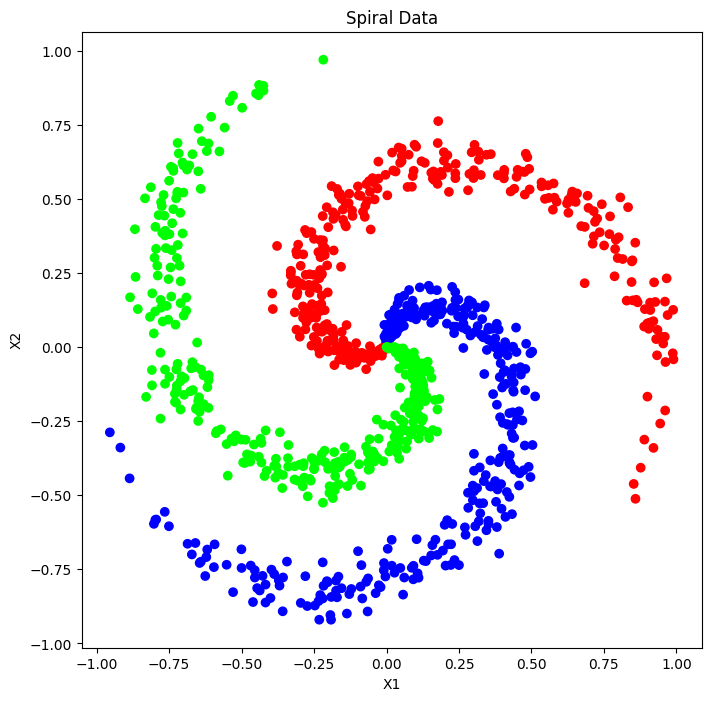

In [2]:
# Function to generate spiral data
def generate_spiral_data(n_points, n_classes):
    X = []
    y = []
    for class_number in range(n_classes):
        ix = range(n_points * class_number, n_points * (class_number + 1))
        r = np.linspace(0.0, 1, n_points)  # radius
        t = np.linspace(class_number * 4, (class_number + 1) * 4, n_points) + np.random.randn(n_points) * 0.2  # theta
        X.extend(np.c_[r * np.sin(t), r * np.cos(t)])
        y.extend([class_number] * n_points)
    return np.array(X), np.array(y)

# Generate spiral data
X, y = generate_spiral_data(333, 3)  # 999 points, 3 classes

# Plot the spiral data
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.title('Spiral Data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [3]:
X

array([[-0.00000000e+00,  0.00000000e+00],
       [ 3.67510074e-04,  2.98954355e-03],
       [ 1.07672320e-03,  5.92709072e-03],
       ...,
       [-2.18147854e-01,  9.69742033e-01],
       [-7.20746302e-01,  6.88846677e-01],
       [-5.29719240e-01,  8.48173052e-01]])

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [5]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
X_test

array([[-0.26511752,  0.24567408],
       [-0.12177164, -0.36263061],
       [ 0.47260641, -0.41585597],
       [-0.43749859, -0.82148651],
       [ 0.0979337 , -0.20022398],
       [ 0.57411369,  0.46364463],
       [-0.65744247, -0.20865505],
       [ 0.12070987,  0.62704116],
       [-0.23823798,  0.19872624],
       [ 0.03112375, -0.01837778],
       [-0.74120321,  0.32727392],
       [ 0.90711378,  0.06772652],
       [-0.48148799, -0.36203133],
       [ 0.64752048,  0.49203423],
       [ 0.12056267, -0.10917812],
       [ 0.15917596,  0.13826765],
       [-0.08824995, -0.46764965],
       [-0.21905603,  0.34257783],
       [-0.14748416, -0.00559791],
       [ 0.45928242, -0.42610967],
       [ 0.40523951,  0.58768232],
       [-0.13248244,  0.00355464],
       [-0.54769379, -0.43398873],
       [-0.63453785, -0.20116779],
       [-0.69980012,  0.10632486],
       [ 0.12758678,  0.12370431],
       [ 0.45726111, -0.21673177],
       [ 0.0871998 , -0.74491355],
       [-0.16071748,

In [7]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
X_test_scaled

array([[-6.18939300e-01,  6.89023653e-01],
       [-2.72428033e-01, -8.51348059e-01],
       [ 1.16436733e+00, -9.86127280e-01],
       [-1.03563761e+00, -2.01327998e+00],
       [ 2.58667641e-01, -4.40095959e-01],
       [ 1.40974179e+00,  1.24097675e+00],
       [-1.56730990e+00, -4.61445433e-01],
       [ 3.13724683e-01,  1.65473550e+00],
       [-5.53963155e-01,  5.70140591e-01],
       [ 9.71673528e-02,  2.03817176e-02],
       [-1.76978550e+00,  8.95653787e-01],
       [ 2.21470589e+00,  2.38418220e-01],
       [-1.14197358e+00, -8.49830544e-01],
       [ 1.58718869e+00,  1.31286596e+00],
       [ 3.13368855e-01, -2.09546258e-01],
       [ 4.06709111e-01,  4.17045088e-01],
       [-1.91395741e-01, -1.11728117e+00],
       [-5.07594464e-01,  9.34406910e-01],
       [-3.34583140e-01,  5.27433814e-02],
       [ 1.13215914e+00, -1.01209210e+00],
       [ 1.00152072e+00,  1.55506958e+00],
       [-2.98319346e-01,  7.59198163e-02],
       [-1.30201344e+00, -1.03204373e+00],
       [-1.

In [9]:
# Define the model
model = Sequential()
model.add(Dense(64, input_dim=2, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

c:\Users\nikhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Compile the model
#model.compile(optimizer= tf.keras.optimizers.SGD(momentum=0.9), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer= "adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [11]:
# Fit the model
history = model.fit(x=X_train_scaled, y=y_train,
                    validation_data=(X_test_scaled, y_test),
                    epochs=50, verbose=1)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4412 - loss: 0.9983 - val_accuracy: 0.5700 - val_loss: 0.8220
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5530 - loss: 0.8248 - val_accuracy: 0.6300 - val_loss: 0.7254
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5572 - loss: 0.7504 - val_accuracy: 0.6350 - val_loss: 0.6683
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6022 - loss: 0.6756 - val_accuracy: 0.6700 - val_loss: 0.6271
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6249 - loss: 0.6622 - val_accuracy: 0.6850 - val_loss: 0.5869
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6901 - loss: 0.5865 - val_accuracy: 0.7350 - val_loss: 0.5534
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7538 - loss: 0.5555 - val_accuracy: 0.7800 - val_loss: 0.5038
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7731 - loss: 0.5056 - val_accuracy: 0.8800 - val_loss

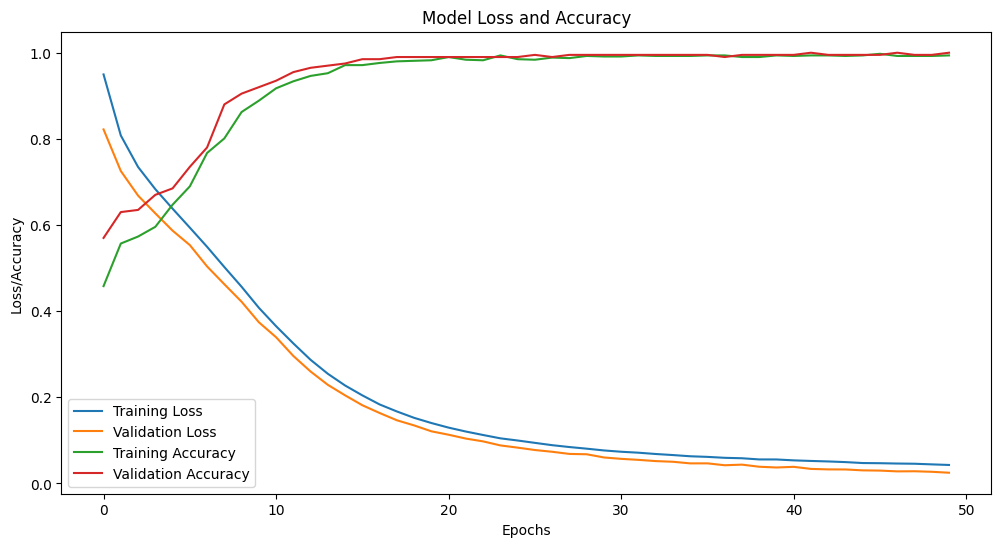

In [12]:
# Plot the training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


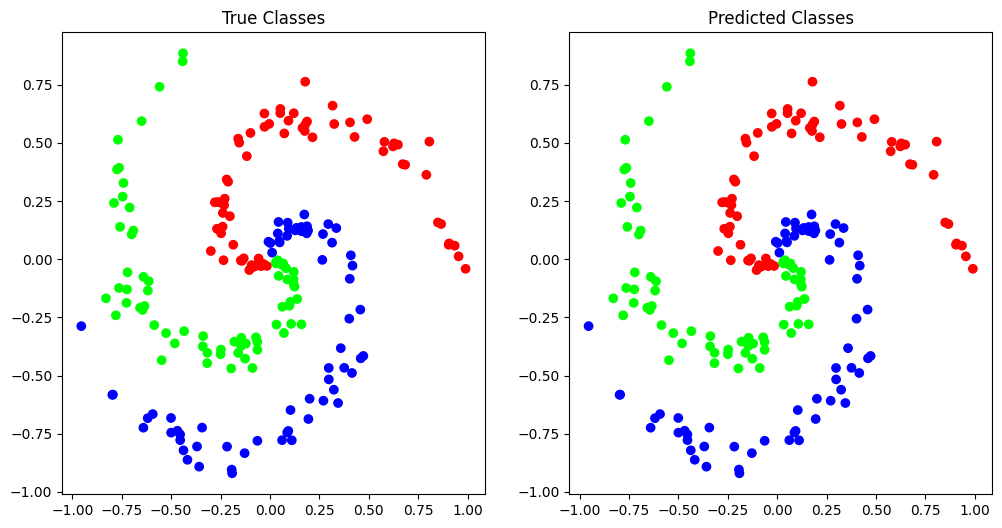

In [13]:
# Predict the class for test data
y_pred = np.argmax(model.predict(X_test_scaled), axis=1)

# Plot the comparison of predictions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='brg')
plt.title('True Classes')
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='brg')
plt.title('Predicted Classes')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


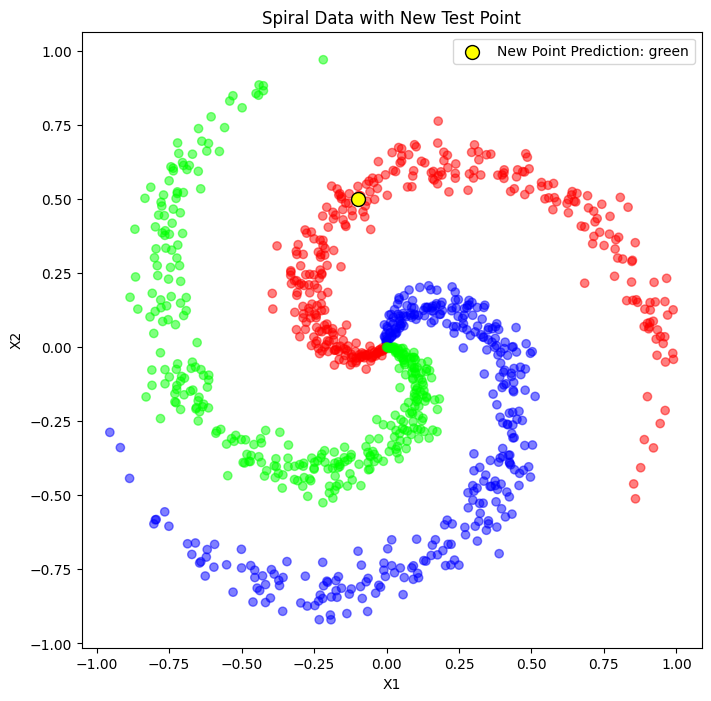

In [16]:
# New test point
new_point = np.array([[-0.1, 0.5]])
new_point_scaled = scaler.transform(new_point)
new_pred = np.argmax(model.predict(new_point_scaled), axis=1)

# Color map for legend
color_map = {0: 'red', 1: 'green', 2: 'blue'}

# Plot the new test point prediction
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg', alpha=0.5)
plt.scatter(new_point[:, 0], new_point[:, 1], c='yellow', edgecolors='black', s=100, label=f'New Point Prediction: {color_map[new_pred[0]]}')
plt.title('Spiral Data with New Test Point')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()